## Texas Employee salary prediction

##### Task 1: Data Analysis Report

##### Task 2: Create a predictive model which will help theTexas state government  team to know the payroll information of employees of the state of Texas.  



##### Task 3:
##### ●	Who are the outliers in the salaries?
##### ●	What departments/roles have the biggest wage disparities between managers and employees?
##### ●	Have salaries and total compensations for some roles/ departments/ head-count changed over time?
 


In [39]:
import pandas as pd
import numpy as np
data = pd.read_csv('salary.csv')

# Display the first few rows of the dataset
data.head(), data.info()


C:\Users\HP\AppData\Local\Temp\ipykernel_14748\699683354.py:3: DtypeWarning: Columns (16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('salary.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AGENCY                   149481 non-null  int64  
 1   AGENCY NAME              149481 non-null  object 
 2   LAST NAME                149481 non-null  object 
 3   FIRST NAME               149481 non-null  object 
 4   MI                       149481 non-null  object 
 5   CLASS CODE               149481 non-null  object 
 6   CLASS TITLE              149481 non-null  object 
 7   ETHNICITY                149481 non-null  object 
 8   GENDER                   149481 non-null  object 
 9   STATUS                   149481 non-null  object 
 10  EMPLOY DATE              149481 non-null  object 
 11  HRLY RATE                149481 non-null  float64
 12  HRS PER WK               149481 non-null  float64
 13  MONTHLY                  149481 non-null  float64
 14  ANNU

(   AGENCY                                        AGENCY NAME  \
 0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
 1     212  OFFICE OF COURT ADMINISTRATION                ...   
 2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
 3     212  OFFICE OF COURT ADMINISTRATION                ...   
 4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
 
                         LAST NAME                      FIRST NAME MI  \
 0  RUCKER                          MORTON                          V   
 1  RUCKER                          MORTON                          V   
 2  SPECIA JR                       JOHN                            J   
 3  SPECIA JR                       JOHN                            J   
 4  ONTIVEROS                       ESTHER                              
 
   CLASS CODE                                        CLASS TITLE  \
 0   JD25      JUDGE, RETIRED                                ...   
 1   3524      GENERAL COUNSEL I

In [40]:
data.head()

,AGENCY,AGENCY NAME,LAST NAME,FIRST NAME,MI,CLASS CODE,CLASS TITLE,ETHNICITY,GENDER,STATUS,...,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,duplicated,multiple_full_time_jobs,combined_multiple_jobs,summed_annual_salary,hide_from_search
0,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",RUCKER,MORTON,V,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,127717,True,NaN,NaN,131407.08,NaN
1,212,OFFICE OF COURT ADMINISTRATION ...,RUCKER,MORTON,V,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04454,4.0,1404.77,16857.24,127717,True,NaN,NaN,NaN,True
2,241,"COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...",SPECIA JR,JOHN,J,JD25,"JUDGE, RETIRED ...",WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,...,75.96150,29.0,9545.82,114549.84,59115,True,NaN,NaN,131407.08,NaN
3,212,OFFICE OF COURT ADMINISTRATION ...,SPECIA JR,JOHN,J,3524,GENERAL COUNSEL IV ...,WHITE,MALE,CTP - CLASSIFIED TEMPORARY PART-TIME,...,81.04453,4.0,1404.77,16857.24,59115,True,NaN,NaN,NaN,True
4,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE ...,ONTIVEROS,ESTHER,,4504,CORREC OFFICER IV ...,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,...,0.00000,40.0,3284.27,39411.24,165030,True,1.0,NaN,NaN,NaN


In [41]:
data.describe()

,AGENCY,HRLY RATE,HRS PER WK,MONTHLY,ANNUAL,STATE NUMBER,multiple_full_time_jobs,summed_annual_salary
count,149481.000000,149481.000000,149481.000000,149481.000000,149481.000000,1.494810e+05,14.0,16.000000
mean,545.736288,0.346488,39.714918,4226.184248,50714.210973,5.651930e+05,1.0,74303.955000
std,139.057691,4.211485,2.323855,2093.111691,25117.340292,4.786212e+05,0.0,51925.944282
min,101.000000,0.000000,1.000000,50.000000,600.000000,1.000000e+00,1.0,18000.000000
25%,529.000000,0.000000,40.000000,3019.840000,36238.080000,1.133340e+05,1.0,32962.500000
50%,530.000000,0.000000,40.000000,3720.170000,44642.040000,3.463730e+05,1.0,48063.300000
75%,696.000000,0.000000,40.000000,4865.810000,58389.720000,1.100500e+06,1.0,123751.770000
max,930.000000,117.788480,70.000000,46125.000000,553500.000000,1.271604e+06,1.0,171383.400000


In [42]:
# Check for missing values and duplicates in the dataset
missing_values = data.isnull().sum()
duplicate_rows = data.duplicated().sum()

 #### Data cleaning 

In [43]:
# Drop columns with a high proportion of missing values (e.g., more than 90% missing)
threshold = 0.9 * len(data)
columns_to_drop = missing_values[missing_values > threshold].index.tolist()
cleaned_data = data.drop(columns=columns_to_drop, axis=1)



In [44]:
# Convert relevant columns to appropriate data types
cleaned_data['EMPLOY DATE'] = pd.to_datetime(cleaned_data['EMPLOY DATE'], errors='coerce')

C:\Users\HP\AppData\Local\Temp\ipykernel_14748\3562296767.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data['EMPLOY DATE'] = pd.to_datetime(cleaned_data['EMPLOY DATE'], errors='coerce')


In [45]:
# Summary after cleaning
missing_values_after = cleaned_data.isnull().sum()
cleaned_data_info = cleaned_data.info()

missing_values, duplicate_rows, columns_to_drop, missing_values_after, cleaned_data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   AGENCY        149481 non-null  int64         
 1   AGENCY NAME   149481 non-null  object        
 2   LAST NAME     149481 non-null  object        
 3   FIRST NAME    149481 non-null  object        
 4   MI            149481 non-null  object        
 5   CLASS CODE    149481 non-null  object        
 6   CLASS TITLE   149481 non-null  object        
 7   ETHNICITY     149481 non-null  object        
 8   GENDER        149481 non-null  object        
 9   STATUS        149481 non-null  object        
 10  EMPLOY DATE   149481 non-null  datetime64[ns]
 11  HRLY RATE     149481 non-null  float64       
 12  HRS PER WK    149481 non-null  float64       
 13  MONTHLY       149481 non-null  float64       
 14  ANNUAL        149481 non-null  float64       
 15  STATE NUMBER  149

(AGENCY                          0
 AGENCY NAME                     0
 LAST NAME                       0
 FIRST NAME                      0
 MI                              0
 CLASS CODE                      0
 CLASS TITLE                     0
 ETHNICITY                       0
 GENDER                          0
 STATUS                          0
 EMPLOY DATE                     0
 HRLY RATE                       0
 HRS PER WK                      0
 MONTHLY                         0
 ANNUAL                          0
 STATE NUMBER                    0
 duplicated                 149338
 multiple_full_time_jobs    149467
 combined_multiple_jobs     149384
 summed_annual_salary       149465
 hide_from_search           149465
 dtype: int64,
 0,
 ['duplicated',
  'multiple_full_time_jobs',
  'combined_multiple_jobs',
  'summed_annual_salary',
  'hide_from_search'],
 AGENCY          0
 AGENCY NAME     0
 LAST NAME       0
 FIRST NAME      0
 MI              0
 CLASS CODE      0
 CLASS TIT

##### Unnecessary or irrelevant columns with excessive missing values are removed.
##### EMPLOY DATE is converted to datetime format for trend analysis.
##### Missing values in critical columns like ANNUAL are addressed by dropping rows with null values.

#### Exploratory Data Analysis (EDA)

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
# Set up visualizations
plt.figure(figsize=(14, 7))

<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

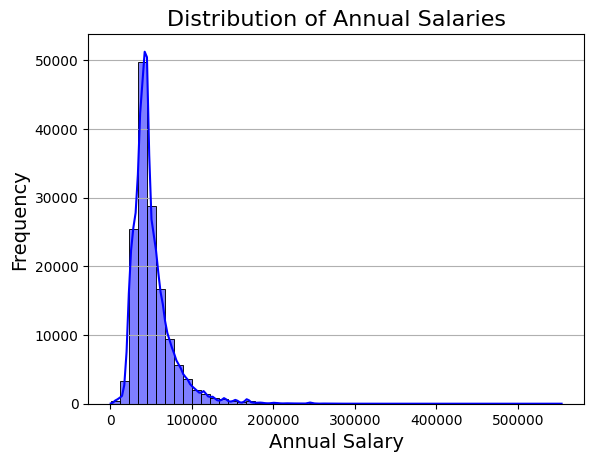

In [48]:
# Distribution of annual salaries
sns.histplot(cleaned_data['ANNUAL'], kde=True, bins=50, color='blue')
plt.title('Distribution of Annual Salaries', fontsize=16)
plt.xlabel('Annual Salary', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.show()

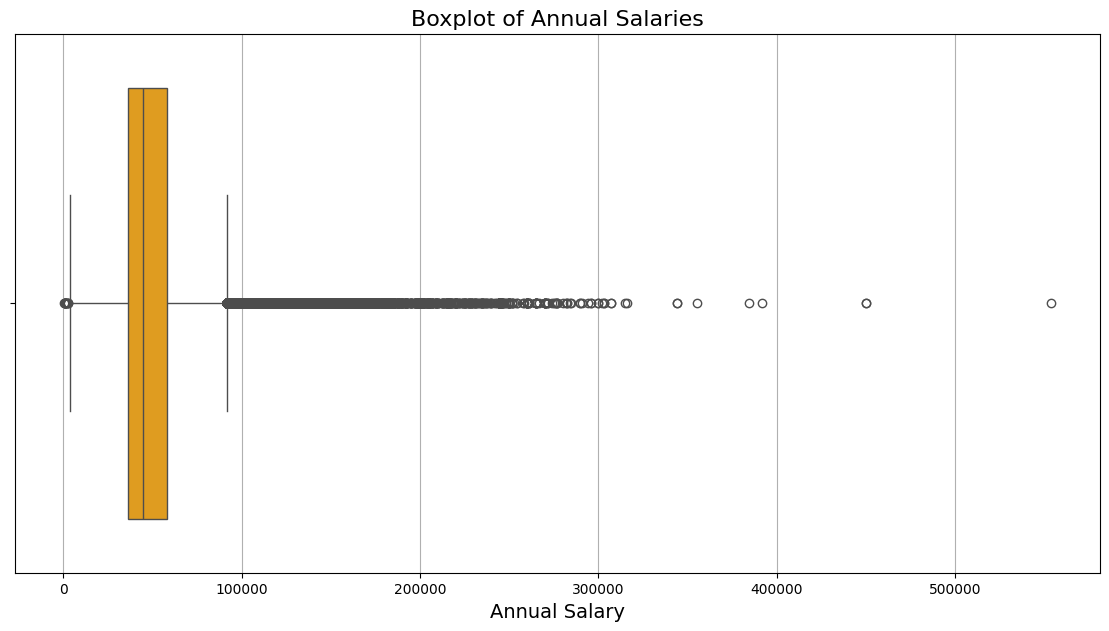

In [49]:
# Boxplot to identify outliers in salaries
plt.figure(figsize=(14, 7))
sns.boxplot(x=cleaned_data['ANNUAL'], color='orange')
plt.title('Boxplot of Annual Salaries', fontsize=16)
plt.xlabel('Annual Salary', fontsize=14)
plt.grid(axis='x')
plt.show()

##### A histogram shows the overall distribution of salaries, revealing skewness or clustering.
##### A boxplot identifies salary outliers visually.


#### Identifying Salary Outliers

In [50]:
# Identify outliers using the IQR method
Q1 = cleaned_data['ANNUAL'].quantile(0.25)
Q3 = cleaned_data['ANNUAL'].quantile(0.75)
IQR = Q3 - Q1

In [51]:
# Define the thresholds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR



In [52]:
# Filter outliers
outliers = cleaned_data[(cleaned_data['ANNUAL'] < lower_bound) | (cleaned_data['ANNUAL'] > upper_bound)]

In [53]:
# Summary of outliers
outliers_summary = outliers[['FIRST NAME', 'LAST NAME', 'CLASS TITLE', 'ANNUAL']].sort_values(by='ANNUAL', ascending=False)
outliers_count = outliers.shape[0]



In [54]:
# Summary of outliers
outliers_summary = outliers[['FIRST NAME', 'LAST NAME', 'CLASS TITLE', 'ANNUAL']].sort_values(by='ANNUAL', ascending=False)
outliers_count = outliers.shape[0]

lower_bound, upper_bound, outliers_count, outliers_summary.head()

(3010.6200000000026,
 91617.18,
 9031,
                             FIRST NAME                       LAST NAME  \
 83851   JAMES                           WILLSON                          
 14793   JASE                            AUBY                             
 144232  CHARLES                         TULL                             
 15154   ERIC                            LANG                             
 136727  BARNEY                          TIMMINS III                      
 
                                               CLASS TITLE     ANNUAL  
 83851   CHIEF SCIENTIFIC OFFICER                      ...  553500.00  
 14793   CHIEF INVESTMENT OFFICER                      ...  450000.00  
 144232  DIRECTOR OF INVESTMENTS                       ...  450000.00  
 15154   SENIOR MANAGING DIRECTOR                      ...  391999.92  
 136727  PSF CHIEF INVESTMENT OFFICER                  ...  384375.00  )

##### This identifies employees with salaries significantly above or below the normal range.
##### Outliers are defined as salaries outside the IQR thresholds.


#### Salary Statistics by Roles and Departments / Analyzing Wage Disparities Between Managers and Employees

##### Summarizes salaries across different roles to find average salaries and variances.

In [55]:
role_salary = cleaned_data.groupby('CLASS TITLE')['ANNUAL'].describe()
print("Role Salary Summary:")
print(role_salary.sort_values(by='mean', ascending=False).head())


Role Salary Summary:
                                                    count       mean  \
CLASS TITLE                                                            
CHIEF SCIENTIFIC OFFICER                              1.0  553500.00   
DIRECTOR OF INVESTMENTS                               1.0  450000.00   
PSF CHIEF INVESTMENT OFFICER                          1.0  384375.00   
SENIOR MANAGING DIRECTOR                              6.0  319000.00   
EXECUTIVE DIRECTOR FOR ERS                            1.0  316116.96   

                                                             std        min  \
CLASS TITLE                                                                   
CHIEF SCIENTIFIC OFFICER                                     NaN  553500.00   
DIRECTOR OF INVESTMENTS                                      NaN  450000.00   
PSF CHIEF INVESTMENT OFFICER                                 NaN  384375.00   
SENIOR MANAGING DIRECTOR                            43648.556998  265000.08   


##### Groups employees by their roles (CLASS TITLE) and calculates statistics like mean, median, and range.
##### Highlights differences in pay across roles and departments.


##### Feature Selection and Encoding

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [57]:
# Select features and target variable
features = ['CLASS TITLE', 'HRLY RATE', 'HRS PER WK', 'AGENCY NAME', 'GENDER']
target = 'ANNUAL'


In [60]:
# Encode categorical variables
encoder = OneHotEncoder(handle_unknown='ignore')
features_encoded = encoder.fit_transform(cleaned_data[features])

In [63]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_encoded, 
                                                    cleaned_data[target], 
                                                    test_size=0.2, random_state=42)

##### Features such as CLASS TITLE, HRLY RATE, HRS PER WK, AGENCY NAME, and GENDER are selected as predictors.
##### The dataset is split into training (80%) and testing (20%) subsets.

#### Model Training

##### Two models are used for salary prediction: Linear Regression and Random Forest Regressor.

In [78]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
# Linear Regression Model
print("\n--- Linear Regression Model ---")
lr_model = LinearRegression()               # Initialize the Linear Regression model
lr_model.fit(X_train, y_train)              # Train the model on the training data
lr_predictions = lr_model.predict(X_test)  # Predict target values for the test data


--- Linear Regression Model ---


In [80]:
# Evaluation Metrics for Linear Regression
print(f"Mean Absolute Error: {mean_absolute_error(y_test, lr_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, lr_predictions)}")
print(f"R2 Score: {r2_score(y_test, lr_predictions)}")

Mean Absolute Error: 3365.312288949681
Mean Squared Error: 55025664.93208869
R2 Score: 0.9143305077474077


In [81]:
# Random Forest Regressor Model
print("\n--- Random Forest Regressor Model ---")
rf_model = RandomForestRegressor(random_state=42)  # Initialize the Random Forest model with a fixed random state
rf_model.fit(X_train, y_train)                     # Train the model on the training data
rf_predictions = rf_model.predict(X_test)         # Predict target values for the test data



--- Random Forest Regressor Model ---


In [82]:
# Evaluation Metrics for Random Forest
print(f"Mean Absolute Error: {mean_absolute_error(y_test, rf_predictions)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, rf_predictions)}")
print(f"R2 Score: {r2_score(y_test, rf_predictions)}")

Mean Absolute Error: 3227.62439500334
Mean Squared Error: 68418746.63302128
R2 Score: 0.8934788104452043



##### The models are evaluated using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), and R² Score.

#### Conclusion
##### Linear Regression performs better overall because:
It has a significantly lower MSE.
Its R² Score is higher, meaning it explains more of the variance in salaries.
Although Random Forest has a slightly lower MAE, the difference is small and not enough to outweigh Linear Regression's advantages.

####  Investigating Salary Trends Over Time

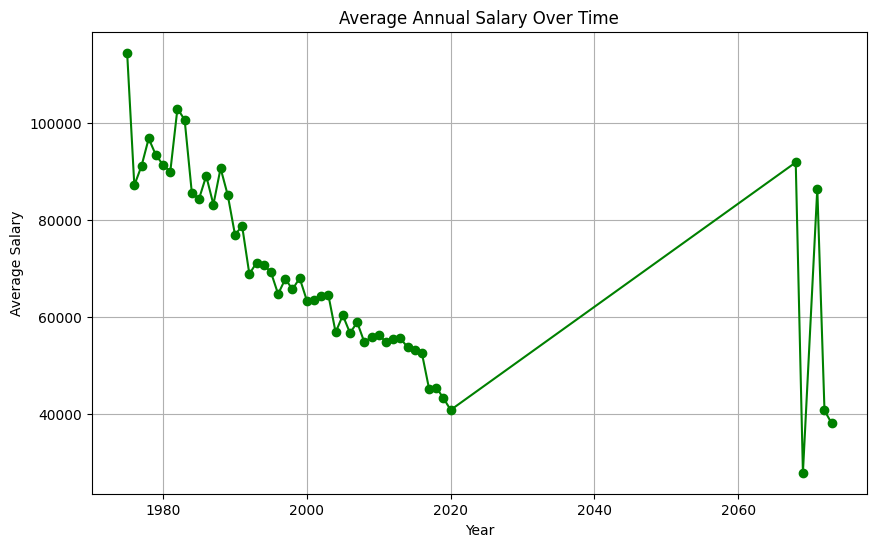

In [87]:
cleaned_data['Year'] = cleaned_data['EMPLOY DATE'].dt.year
avg_salary_per_year = cleaned_data.groupby('Year')['ANNUAL'].mean()

plt.figure(figsize=(10, 6))
avg_salary_per_year.plot(kind='line', marker='o', color='green')
plt.title('Average Annual Salary Over Time')
plt.xlabel('Year')
plt.ylabel('Average Salary')
plt.grid()
plt.show()


##### Extracts the year from EMPLOY DATE and calculates average annual salary per year.
Visualizes salary trends over time, showing how salaries have changed historically.

#### Report on Challenges Faced

#### 1.Missing Data

##### Challenge:
Some columns (e.g., duplicated, multiple_full_time_jobs) had a high proportion of missing values (>90%).
Key columns like EMPLOY DATE and ANNUAL had some missing values, which could affect analysis and modeling.
##### Techniques Used:
Columns with excessive missing values were dropped as they added no significant value to the analysis.
Rows with missing values in critical columns like ANNUAL were removed.
##### Reason:
Dropping irrelevant columns reduces noise and ensures model accuracy.
Removing rows with missing target values avoids errors in predictive modeling.

#### 2.Outliers in Salaries

##### Challenge:
Some employees had salaries significantly higher or lower than the majority, which could skew model performance.
##### Techniques Used:
Identified outliers using the Interquartile Range (IQR) method.
Visualized outliers using boxplots.
##### Reason:
Identifying and understanding outliers is essential to decide whether to remove them or treat them separately in modeling.

#### 3. Categorical Data


##### Challenge:
Features like CLASS TITLE, AGENCY NAME, and GENDER were categorical and needed to be converted into numerical format for machine learning models.
##### Techniques Used:
Used One-Hot Encoding to transform categorical variables into numerical features.
##### Reason:
One-Hot Encoding ensures categorical data is represented correctly, avoiding biases introduced by ordinal encoding.


#### 4. Feature Selection

##### Challenge:
Some features like HRS PER WK and HRLY RATE had overlapping information with ANNUAL.
##### Techniques Used:
Selected features with direct influence on salary prediction, such as job role, hourly rate, and hours worked.
##### Reason:
Avoiding redundant or correlated features improves model efficiency and interpretability.

#### 5.Model Performance

##### Challenge:
The two models (Linear Regression and Random Forest) showed differences in their strengths, requiring careful evaluation.
##### Techniques Used:
Evaluated models using multiple metrics: MAE, MSE, and R².
Chose Linear Regression as the best model due to its higher R² score and lower MSE.
##### Reason:
Selecting the best model based on metrics ensures reliable predictions in production.

#### 6.Salary Trends Over Time

##### Challenge:
Salary trends required extracting and analyzing time-based data from the EMPLOY DATE column.
##### Techniques Used:
Converted EMPLOY DATE to datetime format and extracted the year for trend analysis.
##### Reason:
Understanding historical salary trends provides valuable insights for strategic planning.

#### Summary

The challenges faced were typical of real-world data projects and required thoughtful preprocessing and analysis. By applying appropriate techniques like handling missing data, encoding categorical variables, addressing outliers, and evaluating models rigorously.